In [1]:
import usit.p

from useful_scit.imps2.defs import (
    pd, np, xr, za, mpl, sns, os, glob, 
    dt, sys, crt, Path, pprint, ucp, log, pjoin, plt
)
from useful_scit.imps2.defs import *

import os 
import glob
import sys
import pprint
import datetime as dt
import pandas as pd 
import numpy as np
import matplotlib as mpl
import matplotlib.colors
import matplotlib.pyplot as plt 
import xarray as xr 
import seaborn as sns
import cartopy as crt



In [2]:
from useful_scit.imps2.defs import *

In [3]:
sys.path.insert(0,'/Users/aliaga/Library/Application Support/JetBrains/IntelliJIdea2021.2/scratches/')

In [4]:
import scratch_25

In [32]:
path = '../banana_inspector/data_example/nais_nP_chc.nc'
path = '../banana_inspector/data_example/nais_pP_chc.nc'
path = '../banana_inspector/data_example/smps_chc_data.nc'


d = xr.open_dataarray(path)

In [33]:
d

<xarray.DataArray 'dndlDp' (lDp: 34, secs: 210217)>
[7147378 values with dtype=float64]
Coordinates:
    time     (secs) datetime64[ns] ...
  * lDp      (lDp) float64 -8.0 -7.95 -7.9 -7.85 -7.8 ... -6.5 -6.45 -6.4 -6.35
    Dp       (lDp) float64 ...
  * secs     (secs) float64 1.483e+09 1.483e+09 ... 1.546e+09 1.546e+09

In [34]:
from xarray.plot.plot import _infer_interval_breaks

In [35]:
dp = d['lDp'].copy(deep=True)

In [36]:
b = _infer_interval_breaks(dp,check_monotonic=True)

In [37]:
d1 = pd.Series(b).diff().dropna()

In [38]:
d1.index = d['lDp']
d1.index.name = 'lDp'
d1.name = 'delta_lDp'

In [39]:
d2 = d1.to_xarray()

In [40]:
d2

<xarray.DataArray 'delta_lDp' (lDp: 34)>
array([0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
       0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
       0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
       0.05])
Coordinates:
  * lDp      (lDp) float64 -8.0 -7.95 -7.9 -7.85 -7.8 ... -6.5 -6.45 -6.4 -6.35

In [41]:
d['delta_lDp'] = d2

In [42]:
d

<xarray.DataArray 'dndlDp' (lDp: 34, secs: 210217)>
[7147378 values with dtype=float64]
Coordinates:
    time       (secs) datetime64[ns] ...
  * lDp        (lDp) float64 -8.0 -7.95 -7.9 -7.85 ... -6.5 -6.45 -6.4 -6.35
    Dp         (lDp) float64 1e-08 1.122e-08 1.259e-08 ... 3.981e-07 4.467e-07
  * secs       (secs) float64 1.483e+09 1.483e+09 ... 1.546e+09 1.546e+09
    delta_lDp  (lDp) float64 0.05 0.05 0.05 0.05 0.05 ... 0.05 0.05 0.05 0.05

In [43]:
dd = d * d['delta_lDp']

In [44]:
d['delta_lDp']

<xarray.DataArray 'delta_lDp' (lDp: 34)>
array([0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
       0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
       0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
       0.05])
Coordinates:
  * lDp        (lDp) float64 -8.0 -7.95 -7.9 -7.85 ... -6.5 -6.45 -6.4 -6.35
    Dp         (lDp) float64 1e-08 1.122e-08 1.259e-08 ... 3.981e-07 4.467e-07
    delta_lDp  (lDp) float64 0.05 0.05 0.05 0.05 0.05 ... 0.05 0.05 0.05 0.05

In [45]:
dd2 = dd.sum('lDp')

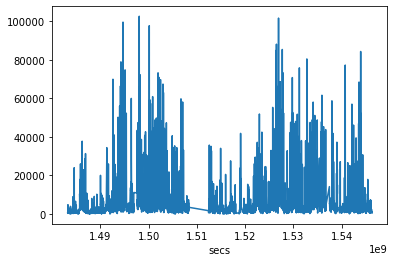

In [46]:
dd2.plot()

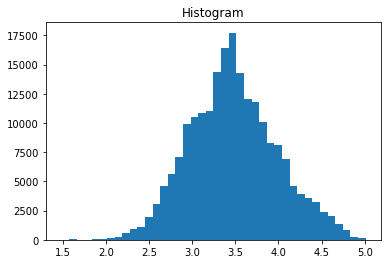

In [47]:
np.log10(dd2[dd2>0]).plot.hist(bins=40);

In [48]:
Dp =d['Dp']

In [49]:
dNdlogDp =d

In [50]:

dNdp = dNdlogDp/Dp

In [51]:
delta_Dp = Dp.isel(lDp=slice(1,None)).values - Dp.isel(lDp =slice(0,-1))

In [25]:
dNdlogDp.load()

<xarray.DataArray 'dndlDp' (secs: 51905, lDp: 29)>
array([[1.32913813e+05, 2.24564498e+05, 2.88669111e+05, ...,
        6.91006473e+04, 0.00000000e+00,            nan],
       [3.57528596e+05, 3.63282377e+05, 2.11981304e+05, ...,
        4.42229701e+05, 2.61163472e+05,            nan],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.17655561e+04, 6.80602550e+03,            nan],
       ...,
       [4.38043861e+04, 3.41023073e+04, 1.25805541e+04, ...,
        6.27675529e+02, 3.09778662e+02,            nan],
       [3.61038067e+03, 3.39502072e+03, 3.14605788e+03, ...,
        5.27976768e+02, 2.88905875e+02,            nan],
       [6.94225976e+03, 4.91802841e+03, 1.41093401e+03, ...,
        5.77020786e+02, 2.38091710e+02,            nan]])
Coordinates:
    time       (secs) datetime64[ns] 2017-12-02T18:30:00 ... 2018-05-31T23:50:00
    Dp         (lDp) float64 1.024e-09 1.183e-09 ... 5.617e-08 6.588e-08
  * lDp        (lDp) float64 -8.99 -8.927 -8.864 -8.802 ... -7.32 -7.25 -7.181
  * secs       (secs) float64 1.512e+09 1.512e+09 ... 1.528e+09 1.528e+09
    delta_lDp  (lDp) float64 0.06261 0.06262 0.06264 ... 0.06882 0.06914 0.06925

In [26]:

su =(dNdp*delta_Dp).sum('lDp')

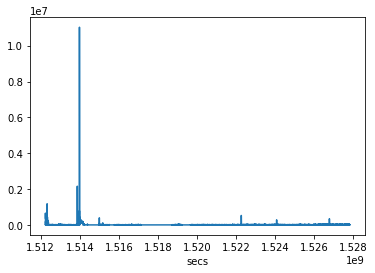

In [27]:
su.plot(
#     ylim=(0,.3e6)
)

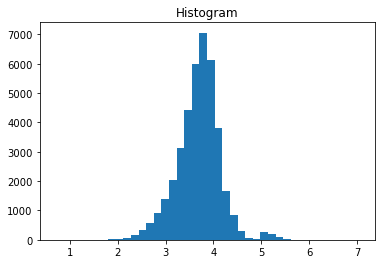

In [28]:
np.log10(su[su>0]).plot.hist(bins=40);

In [29]:
p = '/Volumes/Transcend/diego_tr/bams_meteo/bams_meteo/data/particle_size_dist_v01/smps_may_chc_v01.nc'

In [30]:
d = xr.open_dataset(p)

In [31]:
d

<xarray.Dataset>
Dimensions:   (date: 744, diameter: 67)
Coordinates:
  * date      (date) datetime64[ns] 2018-05-01 ... 2018-05-31T23:00:00
  * diameter  (diameter) float64 10.22 10.92 11.66 12.45 ... 686.2 732.9 782.7
Data variables:
    dndld     (diameter, date) float64 ...

In [49]:
d['Dp']=d['diameter']*1e-9

In [50]:
d['lDp'] = np.log10(d['Dp'])

In [51]:
e = d.swap_dims({'diameter':'lDp'})['dndld']

In [52]:
dp = d['lDp']

In [53]:
b = _infer_interval_breaks(dp,check_monotonic=True)

In [54]:
d1 = pd.Series(b).diff().dropna()

In [55]:
d1.index = e['lDp']
d1.index.name = 'lDp'
d1.name = 'delta_lDp'

In [56]:
e['delta_lDp'] = d1

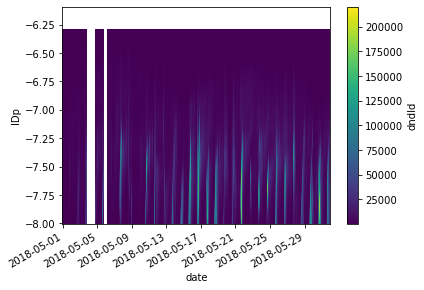

In [57]:
e.plot()

In [58]:
s = (e * e['delta_lDp']).sum('lDp')

(array([454., 140.,  65.,  23.,  25.,  18.,   8.,   5.,   4.,   2.]),
 array([    0.        ,  9941.05753198, 19882.11506396, 29823.17259595,
        39764.23012793, 49705.28765991, 59646.34519189, 69587.40272388,
        79528.46025586, 89469.51778784, 99410.57531982]),
 <BarContainer object of 10 artists>)

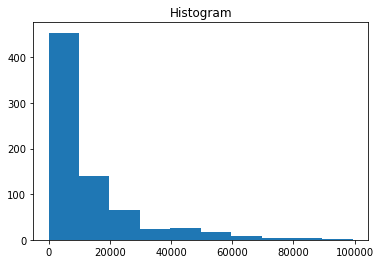

In [59]:
s.plot.hist()

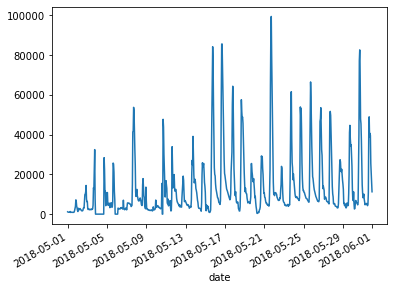

In [60]:
s.plot()

In [61]:
%gui qt5

In [62]:
import pyqtgraph as pg 

In [63]:
pg.plot(s)

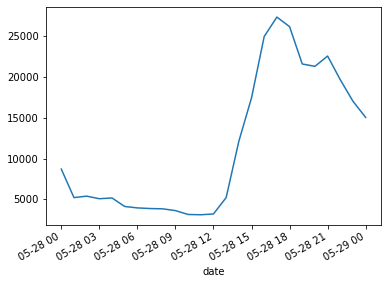

In [64]:
s.loc[{'date':slice('2018-05-28','2018-05-29 00')}].plot()

In [65]:
p = '/Volumes/mbProD/bolivia_campaign_data/PSM/data_v01/cpc_tsi/3772_conc_2018_148.h5'
c = xr.open_dataset(p)

In [66]:
c

<xarray.Dataset>
Dimensions:       (time: 86400)
Coordinates:
  * time          (time) datetime64[ns] 2018-05-28 ... 2018-05-28T23:59:59
Data variables:
    CPC_CONC_tsi  (time) float64 ...

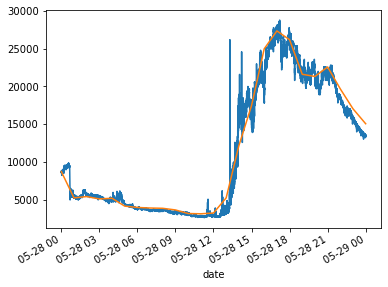

In [68]:
(c['CPC_CONC_tsi']*2).plot()
s.loc[{'date':slice('2018-05-28','2018-05-29 00')}].plot()

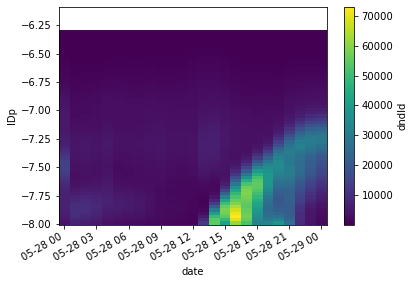

In [69]:
e.loc[{'date':slice('2018-05-28','2018-05-29 00')}].plot()

In [70]:
p = '/Volumes/mbProD/EBAS_smps_chc_download_2021_08/raw_data_sara/BO0001R.20170101000000.20190917180155.smps.particle_number_size_distribution.aerosol.1y.1h.BO01L_SMPS_UMSA-LAP_CHACALTAYA_BOLIVIA.DE08L_TROPOS_CL_SMPS.lev2.nc'

In [78]:
p = '/Volumes/mbProD/EBAS_smps_chc_download_2021_08/raw_data_sara/BO0001R.20180101000000.20190917180510.smps.particle_number_size_distribution.aerosol.1y.1h.BO01L_SMPS_UMSA-LAP_CHACALTAYA_BOLIVIA.DE08L_TROPOS_CL_SMPS.lev2.nc'

In [79]:
d = xr.open_dataset(p)

In [80]:
da = d['particle_number_size_distribution_amean']

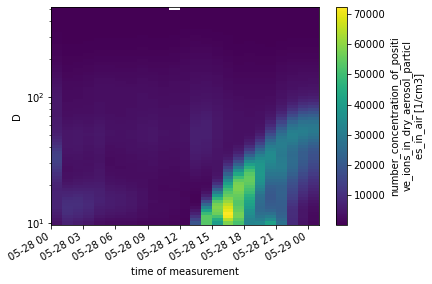

In [84]:
da.loc[{'time':slice('2018-05-28','2018-05-29 00')}].plot(yscale = 'log')

In [90]:
d

<xarray.Dataset>
Dimensions:                                                  (time: 8759, tbnds: 2, metadata_time: 1, D: 71, particle_number_size_distribution_amean_qc_flags: 1, particle_number_size_distribution_prec1587_qc_flags: 1, particle_number_size_distribution_perc8413_qc_flags: 1)
Coordinates:
  * time                                                     (time) datetime64[ns] ...
  * metadata_time                                            (metadata_time) datetime64[ns] ...
  * D                                                        (D) float64 10.0...
Dimensions without coordinates: tbnds, particle_number_size_distribution_amean_qc_flags, particle_number_size_distribution_prec1587_qc_flags, particle_number_size_distribution_perc8413_qc_flags
Data variables:
    time_bnds                                                (time, tbnds) datetime64[ns] ...
    metadata_time_bnds                                       (metadata_time, tbnds) datetime64[ns] ...
    particle_number_size_distribution_amean                  (D, time) float64 ...
    particle_number_size_distribution_amean_qc               (D, particle_number_size_distribution_amean_qc_flags, time) float64 ...
    particle_number_size_distribution_amean_ebasmetadata     (D, metadata_time) object ...
    particle_number_size_distribution_prec1587               (D, time) float64 ...
    particle_number_size_distribution_prec1587_qc            (D, particle_number_size_distribution_prec1587_qc_flags, time) float64 ...
    particle_number_size_distribution_prec1587_ebasmetadata  (D, metadata_time) object ...
    particle_number_size_distribution_perc8413               (D, time) float64 ...
    particle_number_size_distribution_perc8413_qc            (D, particle_number_size_distribution_perc8413_qc_flags, time) float64 ...
    particle_number_size_distribution_perc8413_ebasmetadata  (D, metadata_time) object ...
Attributes: (12/97)
    Conventions:                                   CF-1.8, ACDD-1.3
    featureType:                                   timeSeries
    title:                                         Ground based in situ obser...
    keywords:                                      GUAN, BO0001R, particle_nu...
    id:                                            BO0001R.20180101000000.201...
    naming_authority:                              no.nilu.ebas
    ...                                            ...
    ebas_framework_acronym:                        ACTRIS, GAW-WDCA, GUAN
    ebas_originator:                               Zaratti, Francesco, fzarat...
    ebas_submitter:                                Velarde, Fernando, fvelard...
    ebas_acknowledgement:                          Request acknowledgement de...
    ebas_comment:                                  None
    ebas_metadata:                                 {\n    "Data definition": ...

In [89]:
d['time']

<xarray.DataArray 'time' (time: 8759)>
array(['2018-01-01T00:30:00.000000000', '2018-01-01T01:30:00.000000000',
       '2018-01-01T02:30:00.000000000', ..., '2018-12-31T20:30:00.000000000',
       '2018-12-31T21:30:00.000000000', '2018-12-31T22:30:00.049999872'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2018-01-01T00:30:00 ... 2018-12-31T22:30:0...
Attributes:
    standard_name:  time
    long_name:      time of measurement
    axis:           T
    bounds:         time_bnds